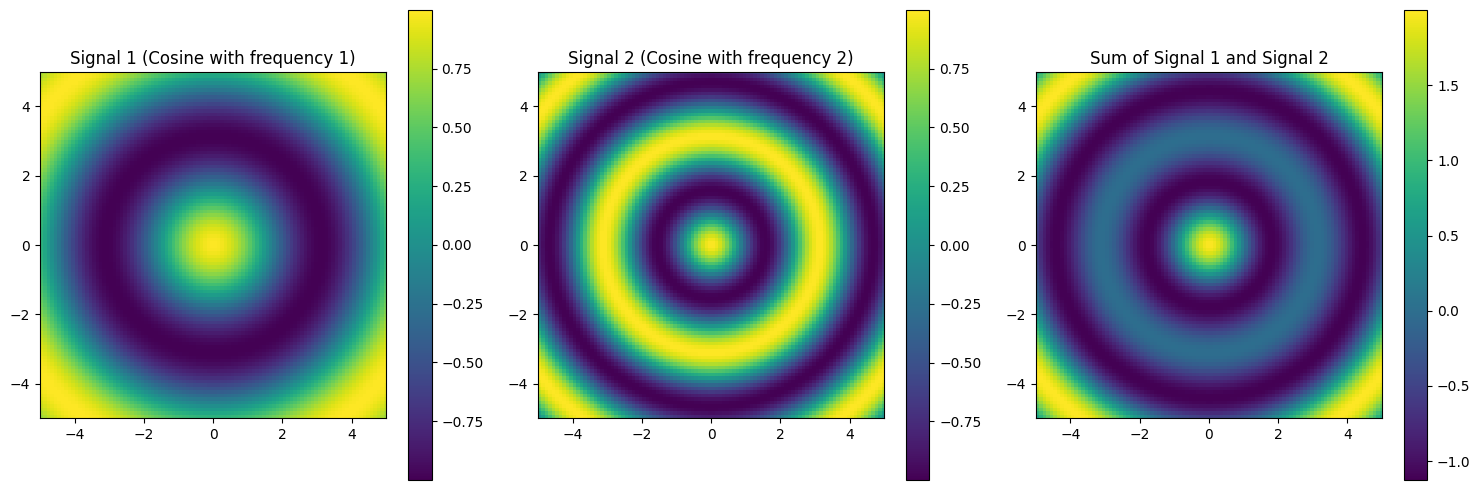

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import fftpack


# Generate a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Generate two 2D signals with differing frequencies for the cosine function
z1 = np.cos(1 * np.sqrt(x**2 + y**2))

z2 = np.cos(2 * np.sqrt(x**2 + y**2))

# Compute the sum of the two signals
z_sum = z1 + z2

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first signal
im1 = axs[0].imshow(z1, origin='lower', extent=(-5, 5, -5, 5), cmap='viridis')
axs[0].set_title('Signal 1 (Cosine with frequency 1)')
fig.colorbar(im1, ax=axs[0])

# Plot the second signal
im2 = axs[1].imshow(z2, origin='lower', extent=(-5, 5, -5, 5), cmap='viridis')
axs[1].set_title('Signal 2 (Cosine with frequency 2)')
fig.colorbar(im2, ax=axs[1])

# Plot the sum of the two signals
im3 = axs[2].imshow(z_sum, origin='lower', extent=(-5, 5, -5, 5), cmap='viridis')
axs[2].set_title('Sum of Signal 1 and Signal 2')
fig.colorbar(im3, ax=axs[2])

# Show the plots
plt.tight_layout()
plt.show()


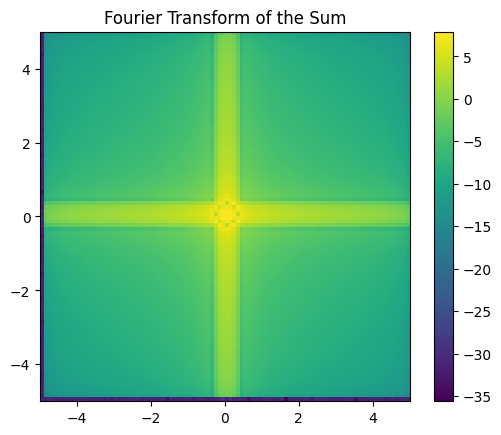

In [4]:
# Take the Fourier transform of the sum
z_fft = np.fft.fft2(z_sum)

# Shift the zero-frequency component to the center of the spectrum
z_fft_shift = np.fft.fftshift(z_fft)

# Take the absolute value of the Fourier transform
z_fft_abs = np.abs(z_fft_shift)

# Plot the Fourier transform
plt.imshow(np.log(z_fft_abs), extent=(-5, 5, -5, 5), origin='lower')
plt.title('Fourier Transform of the Sum')
plt.colorbar()
plt.show()

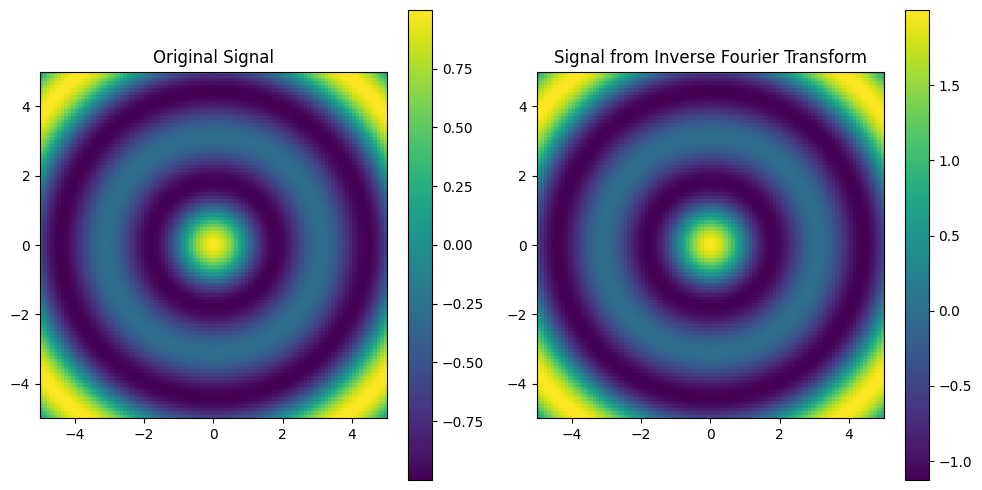

In [15]:
# Take the inverse Fourier transform of the Fourier transform
z_ifft = np.fft.ifft2(np.fft.ifftshift(z_fft_shift))

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original signal
axs[0].imshow(z_sum, origin='lower', extent=(-5, 5, -5, 5), cmap='viridis')
axs[0].set_title('Original Signal')
fig.colorbar(im1, ax=axs[0])

# Plot the signal obtained from the inverse Fourier transform
im2 = axs[1].imshow(np.real(z_ifft), origin='lower', extent=(-5, 5, -5, 5), cmap='viridis')
axs[1].set_title('Signal from Inverse Fourier Transform')
fig.colorbar(im2, ax=axs[1])

# Show the plots
plt.tight_layout()
plt.show()